<a href="https://colab.research.google.com/github/dharma610/Project/blob/master/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
!pip install mpld3
import mpld3
mpld3.enable_notebook()

In [38]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [39]:
def plotsir(t, S, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')

  ax.set_xlabel('Time (days)')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

In [40]:
import random
gamma = []
for i in range(1000):
    gamma.append(random.uniform(0, 1))
    


In [41]:
beta = []
for i in range(1000):
  beta.append(2*gamma[i])  #Parameters can be seen as list beta and gamma

In [42]:
P = []
Q = []
M  = []
for i in range(1000): #Plotted for 2 sets
  N = 1000
  S0, I0, R0 = 999, 1, 0  # initial conditions: one infected, rest susceptible
  t = np.linspace(0, 99, 100) # Grid of time points (in days)
  y0 = S0, I0, R0 # Initial conditions vector
  # Integrate the SIR equations over the time grid, t.
  ret = odeint(deriv, y0, t, args=(N, beta[i], gamma[i]))
  S, I, R = ret.T
  P.append(S)
  Q.append(I)
  M.append(R)

  

In [74]:
beta_list = []
for i in range(1000):
  for j in range(10):
    beta_list.append(beta[i])

In [76]:
Beta = pd.DataFrame(beta_list)

In [43]:
import pandas as pd
from random import sample

In [44]:
S_value = pd.DataFrame(P)
S_value.to_csv("Susceptible.csv")

In [45]:
I_value = pd.DataFrame(Q)
I_value.to_csv("Infected.csv")

In [46]:
R_value = pd.DataFrame(M)
R_value.to_csv("Recovered.csv")

In [47]:
S_list = []
S_actual = []
I_list = []
I_actual = []
R_list = []
R_actual = []
for i in range(1000):
  p = sample(range(0, 99), 10)
  S_list.append(S_value[p].iloc[i].to_list())
  S_actual.append(S_value[[x+1 for x in p]].iloc[i].to_list())
  I_list.append(I_value[p].iloc[i].to_list())
  I_actual.append(I_value[[x+1 for x in p]].iloc[i].to_list())
  R_list.append(R_value[p].iloc[i].to_list())
  R_actual.append(R_value[[x+1 for x in p]].iloc[i].to_list())
  


In [48]:
sus_list = []
for i in range(1000):
 sus_list = sus_list+S_list[i]
  



In [49]:
infected_list = []
for i in range(1000):
 infected_list = infected_list+I_list[i]
  



In [50]:
recov_list = []
for i in range(1000):
 recov_list = recov_list+R_list[i]
  



In [51]:
susactual_list = []
for i in range(1000):
 susactual_list = susactual_list+S_actual[i]

In [52]:
infectedactual_list = []
for i in range(1000):
 infectedactual_list = infectedactual_list+I_actual[i]

In [53]:
recovactual_list = []
for i in range(1000):
 recovactual_list = recovactual_list+R_actual[i]

In [54]:
df_1 = pd.DataFrame(sus_list)
df_2 = pd.DataFrame(infected_list)
df_3 = pd.DataFrame(recov_list)
df_4 = pd.DataFrame(susactual_list)
df_5 = pd.DataFrame(infectedactual_list)
df_6 = pd.DataFrame(recovactual_list)

In [77]:
data = pd.concat([df_1, df_2,df_3,df_4,df_5,df_6,Beta], axis=1)


In [78]:
data.columns = range(data.shape[1])
data

,0,1,2,3,4,5,6
0,231.446583,3.735058e+01,731.202833,218.765019,2.185669e+01,759.378295,1.944862
1,203.721396,1.277894e+00,795.000710,203.336961,7.179053e-01,795.945134,1.944862
2,202.845900,2.059663e-08,797.154100,202.845900,1.151595e-08,797.154100,1.944862
3,965.660057,1.736849e+01,16.971457,914.835142,4.115941e+01,44.005451,1.944862
4,202.845900,-5.527482e-11,797.154100,202.845900,-5.410623e-11,797.154100,1.944862
...,...,...,...,...,...,...,...
9995,556.116240,1.509950e+02,292.888721,544.860681,1.520270e+02,303.112324,0.134939
9996,931.747307,3.340613e+01,34.846565,927.432877,3.539995e+01,37.167178,0.134939
9997,998.860564,1.069643e+00,0.069792,998.711441,1.144114e+00,0.144445,0.134939
9998,987.942871,6.492176e+00,5.564953,987.048682,6.933609e+00,6.017709,0.134939


In [128]:
X = data[[0,1,2,6]]
X_without_beta = data[[0,1,2,]]
y = data[[3,4,5]]

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
# load the dataset
# define the keras model
model = Sequential()
model.add(Dense(64, input_dim=4, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32,  activation='relu'))
model.add(Dense(16,  activation='relu'))
model.add(Dense(16,  activation='relu'))
model.add(Dense(3, activation='relu'))
# compile the keras model
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])
# checkpoint
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
# fit the keras model on the dataset
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=10, callbacks=callbacks_list, verbose=0)




Epoch 00001: val_accuracy improved from -inf to 0.99687, saving model to weights-improvement-01-1.00.hdf5


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '



Epoch 00002: val_accuracy did not improve from 0.99687

Epoch 00003: val_accuracy did not improve from 0.99687

Epoch 00004: val_accuracy did not improve from 0.99687

Epoch 00005: val_accuracy did not improve from 0.99687

Epoch 00006: val_accuracy did not improve from 0.99687

Epoch 00007: val_accuracy did not improve from 0.99687

Epoch 00008: val_accuracy did not improve from 0.99687

Epoch 00009: val_accuracy did not improve from 0.99687

Epoch 00010: val_accuracy did not improve from 0.99687

Epoch 00011: val_accuracy did not improve from 0.99687

Epoch 00012: val_accuracy improved from 0.99687 to 0.99813, saving model to weights-improvement-12-1.00.hdf5

Epoch 00013: val_accuracy did not improve from 0.99813

Epoch 00014: val_accuracy did not improve from 0.99813

Epoch 00015: val_accuracy did not improve from 0.99813

Epoch 00016: val_accuracy improved from 0.99813 to 0.99937, saving model to weights-improvement-16-1.00.hdf5

Epoch 00017: val_accuracy did not improve from 0.99

In [133]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

2000/2000 [==============================] - 0s 21us/step
Accuracy: 99.95


In [134]:
y_pred1 = model.predict(X_train)
y_pred2 = model.predict(X_test)

In [135]:
df_7 = pd.DataFrame(y_pred1)
df_8 = pd.DataFrame(y_pred2)

In [136]:
df_7      #columns are in S,I,R order

,0,1,2
0,202.121399,0.000000,789.063538
1,202.276337,0.000000,789.987976
2,201.926147,0.000000,787.898865
3,1035.986084,0.000000,0.000000
4,287.446991,92.597565,648.390930
...,...,...,...
7995,202.150696,0.000000,789.238464
7996,257.824554,74.736908,684.568909
7997,201.785294,0.000000,787.058411
7998,202.440826,0.000000,790.969299


In [137]:
y_test

,3,4,5
6252,415.159874,145.794577,439.045549
4684,992.565913,4.203408,3.230678
1731,215.229497,17.245559,767.524944
4742,202.877896,0.046866,797.075238
4521,211.539987,12.289648,776.170365
...,...,...,...
6412,203.040746,0.285205,796.674049
8285,202.849449,0.005200,797.145351
7853,202.845905,0.000007,797.154088
1095,259.231789,66.252128,674.516083


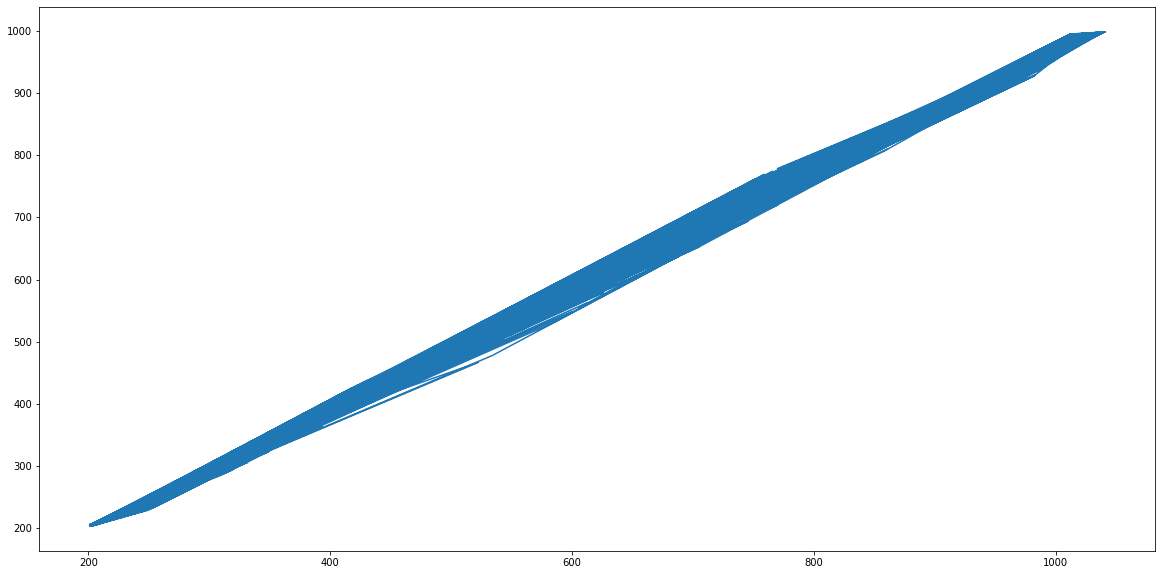

In [138]:
plt.figure(figsize=(20,10))
plt.plot(df_7[0],y_train[3])    #plot of S_pred1 vs s_actual1                
                                #pred1 corresponds to prediction on training sets , where as actual1 corresponds actual value(y_train)
                                

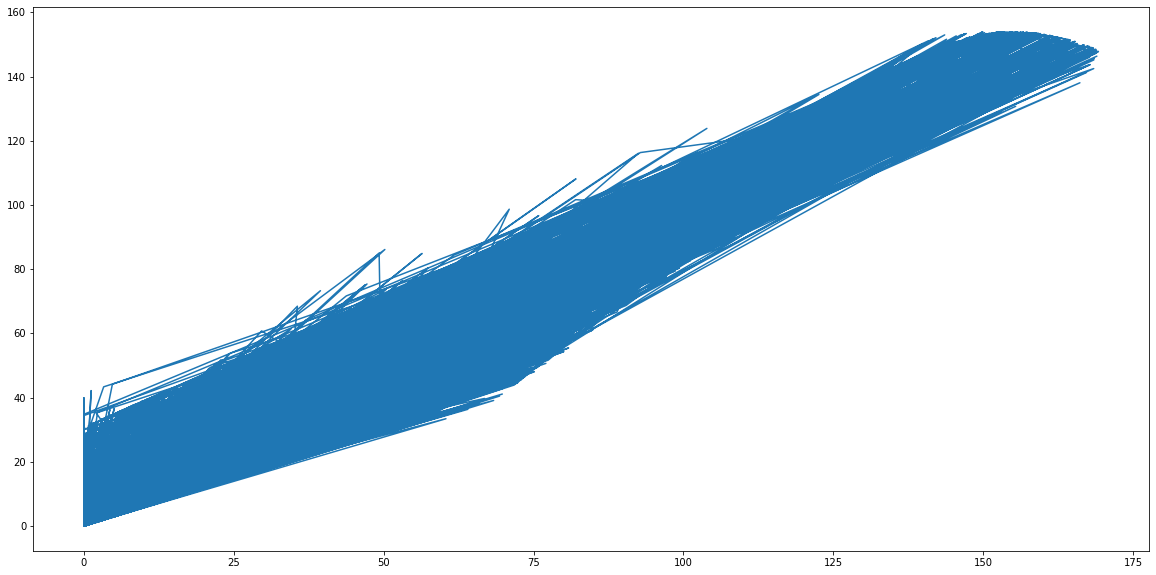

In [139]:
plt.figure(figsize=(20,10))
plt.plot(df_7[1],y_train[4])    #plot of I_pred1 vs I_actual1

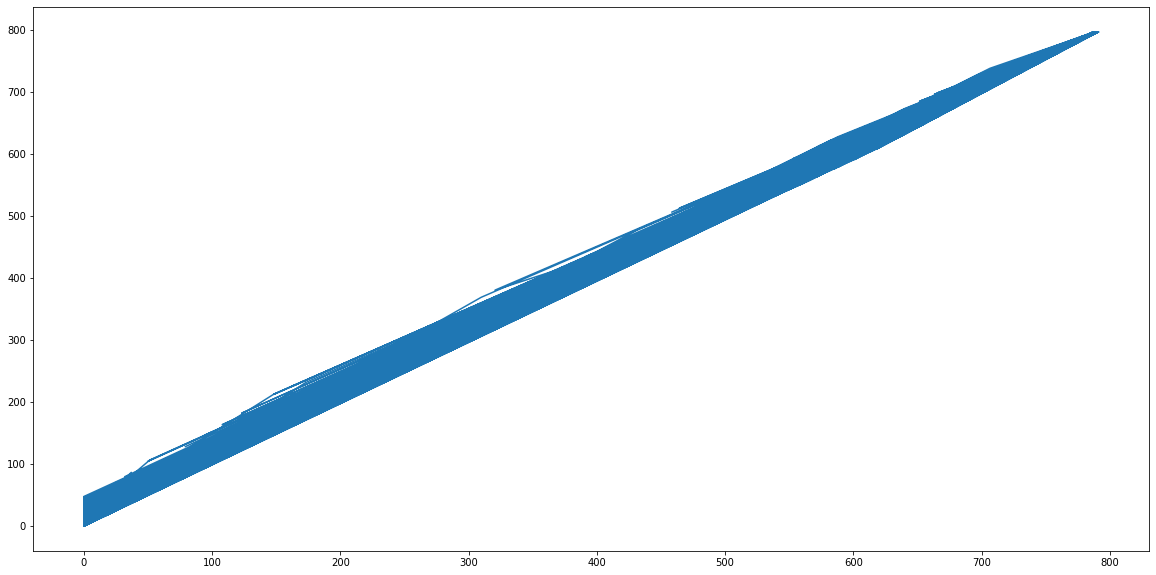

In [140]:
plt.figure(figsize=(20,10))
plt.plot(df_7[2],y_train[5])    #plot of R_pred1 vs R_actual1

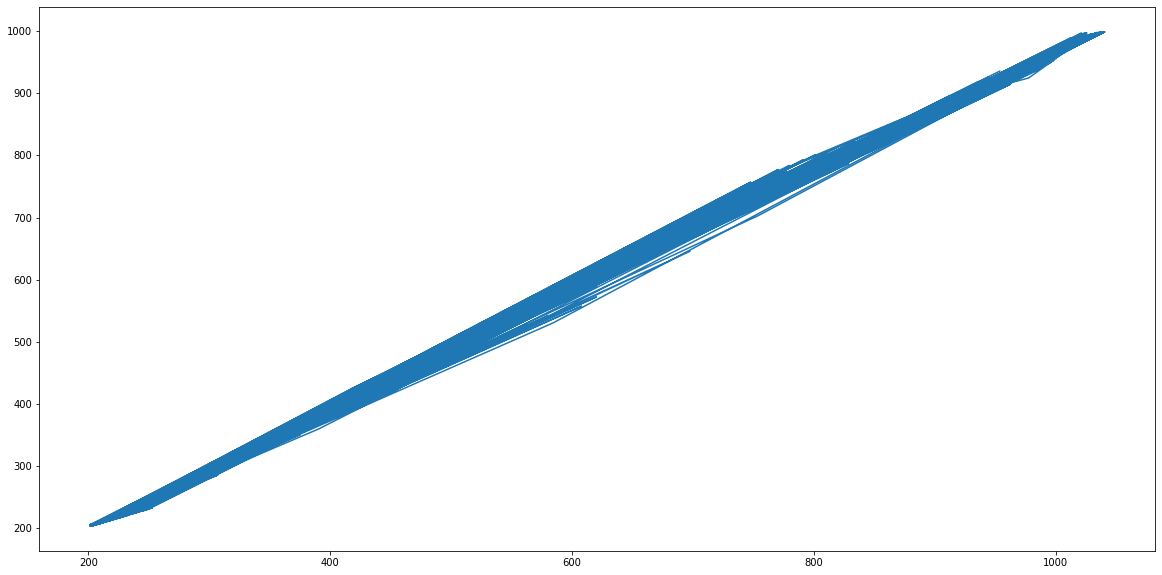

In [141]:
plt.figure(figsize=(20,10))
plt.plot(df_8[0],y_test[3])    #plot of S_pred2 vs S_actual2
                               #pred2 corresponds to prediction on test sets , where as actual2 corresponds actual value(y_test)

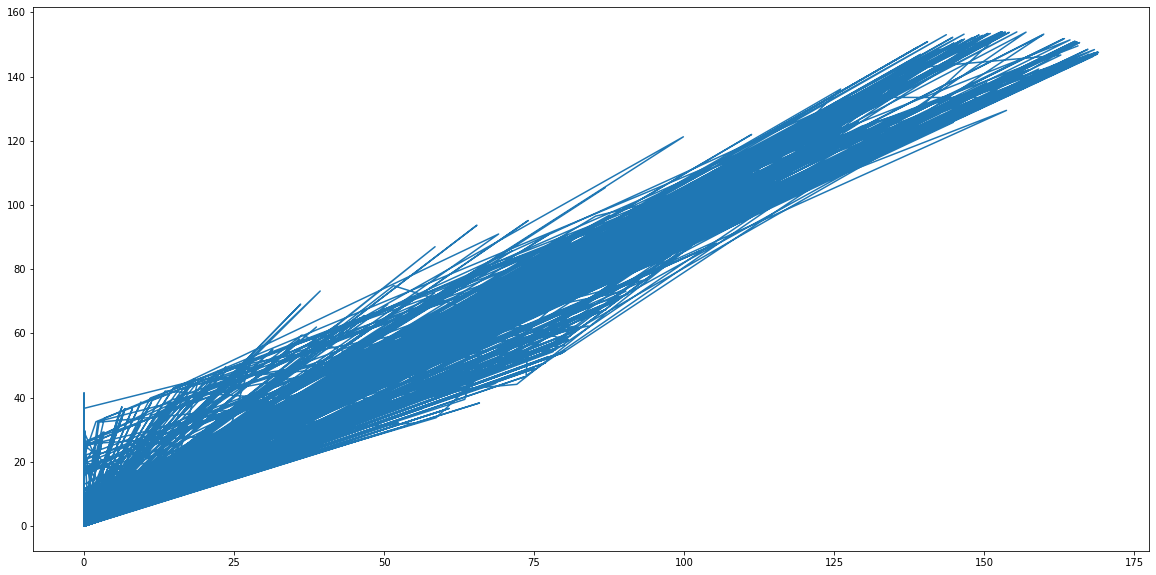

In [142]:
plt.figure(figsize=(20,10))
plt.plot(df_8[1],y_test[4])    #plot of I_pred2 vs I_actual2

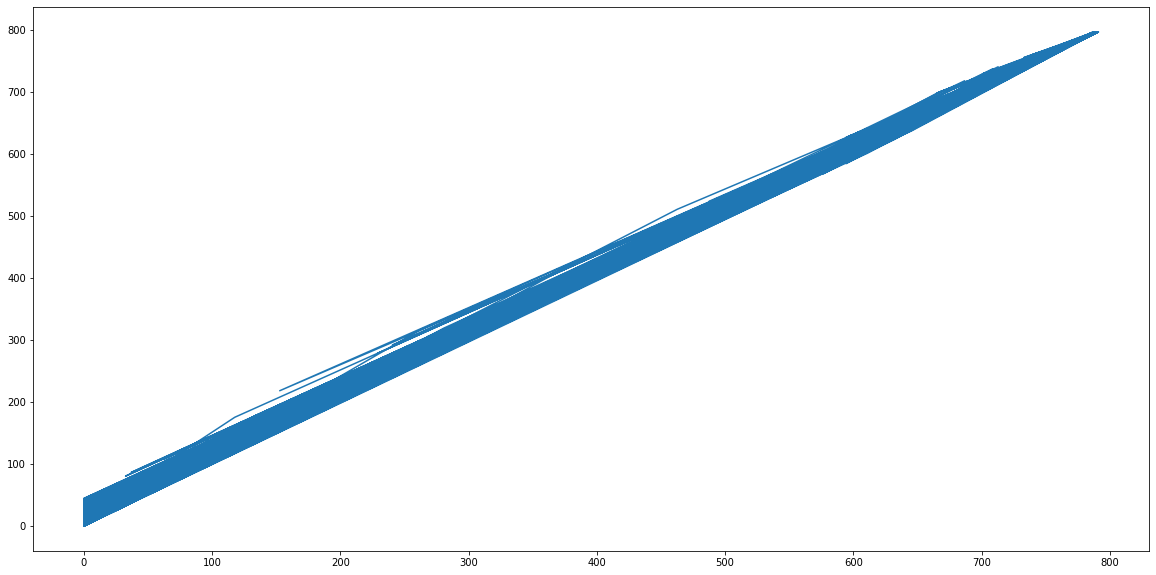

In [143]:
plt.figure(figsize=(20,10))
plt.plot(df_8[2],y_test[5])    #plot of R_pred2 vs R_actual2